<a href="https://colab.research.google.com/github/gabrielcapela/Panorama_Covid-19/blob/main/Panorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 até 2024
<img  width="40%" src="https://raw.githubusercontent.com/gabrielcapela/Panorama_Covid-19_Brasil/main/covid.png">


*by Gabriel Capela*

---


##Introdução



A pandemia de COVID-19 aconteceu em dezembro de 2019 em Wuhan, China. Rapidamente, a doença se espalhou para outros países e continentes, provocando uma crise de saúde sem precedentes na era moderna. Em 2020, em março, a Organização Mundial de Saúde declarou a COVID-19 como pandemia, destacando a seriedade e a urgência de parar sua propagação.

Em países onde os sistemas de saúde estavam submetidos ao limite, medidas drásticas como quarentenas, lockdowns e restrições de viagem foram tomadas. O impacto não foi restrito à saúde pública, afetando também o âmbito econômico, social e político.

O Brasil passou por várias ondas de infecção que geraram altos índices de mortalidade e pressão sobre seu sistema de saúde, fatores agravados pela extensão do país e disparidade socioeconômica. Em resposta, campanhas de vacinação em massa foram implementadas, que se mostraram fundamentais para diminuir o número de casos graves e mortes.

Atualmente, embora a situação da pandemia tenha se tornado mais controlada em muitas partes do mundo, a COVID-19 permanece uma preocupação. A vigilância e a adaptação às novas variantes do vírus são fatores cruciais para evitar novos surtos.

O presente estudo tem o objetivo de realizar uma análise dos dados quantitativos sobre a COVID-19, realçar algumas correlações e expor diversas formas de visualizações dos dados, de modo a propor um melhor entendimento desse contexto. Para isso foi dividido em 4 tópicos: a presente introdução, expondo o tema a ser estudado; a Obtenção dos Dados, na qual é apresentada a fonte dos dados utilizados e realizada uma breve exposição das suas variáveis; Análise Exploratória dos Dados, na qual é dividida em dois subtópicos, no primeiro feita uma análise dos dados em nível global, comparando os países, no segundo a análise é restrita ao Brasil; e por último uma breve conclusão sobre os tópicos estudados.

## Obtenção dos Dados

A obtenção dos dados não é uma simples tarefa no contexto de uma pandemia. Conflitos e inconsistências entre os dados divulgados por diferentes níveis de governo e fontes não oficiais dificultaram a compreensão precisa do que aconteceu. Discrepâncias na metodologia de coleta, atrasos na atualização de registros e divergências nos critérios para contagem de casos e óbitos contribuíram para divergências nos números e complicaram a tomada de decisões e a formulação de políticas eficazes para o combate à pandemia.

Para essa análise foram escolhidos dados provenientes da  [Our World in Data](https://ourworldindata.org) (Nosso Mundo em Dados, em tradução literal) que é uma publicação digital, sem fins lucrativos, especializada em expor pesquisas empíricas e dados analíticos sobre mudanças nas condições de qualidade de vida ao redor do mundo.

O conjunto de dados em análise pode ser encontrado no perfil dessa organização no GitHub pelo seguinte [link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv). Tal arquivo teve sua última atualização em agosto de 2024.


### Dicionário de Variáveis




A descrição completa do nome de cada coluna do conjunto de dados, assim como sua fonte e categoria a qual se enquadra pode ser encontrada
    [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

Segue abaixo a descrições dos dados que serão utilizados nessa análise:

In [45]:
# Importando a biblioteca pandas:
import pandas as pd

# Importando o arquivo com os metadados:
df_metadados = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-codebook.csv", index_col=0)

# Selecionando a coluna 'description' em um formato com bordas:
df_metadados[['description']].style.set_table_styles([
    {'selector': 'table', 'props': [('border', '2px solid black')]},
    {'selector': 'th', 'props': [('border', '2px solid black'), ('background-color', '#f2f2f2')]},
    {'selector': 'td', 'props': [('border', '2px solid black'), ('text-align', 'left')]},  # Alinhando à direita
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},  # Linha alternada
])


,description
column,
iso_code,ISO 3166-1 alpha-3 – three-letter country codes. Note that OWID-defined regions (e.g. continents like 'Europe') contain prefix 'OWID_'.
continent,Continent of the geographical location
location,Geographical location
date,Date of observation
total_cases,"Total confirmed cases of COVID-19. Counts can include probable cases, where reported."
new_cases,"New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA."
new_cases_smoothed,"New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported."
total_deaths,"Total deaths attributed to COVID-19. Counts can include probable deaths, where reported."
new_deaths,"New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA."


### Importando os dados do COVID-19

In [46]:
# Importando o dataset COVID-19 para um DataFrame:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-data.csv")

## Análise Exploratória dos Dados

Essa análise tem o intuito compreender melhor o dataset (conjunto de dados) estudado, identificando padrões, tendências, anomalias e relações entre variáveis.

Ela serve como uma etapa preliminar para guiar a fase de modelagem e tomada de decisões, na qual cientistas de dados obtém insights valiosos e levantem hipóteses sobre o comportamento dos dados.


### Análise Exploratória Inicial

Nesse tópico serão analisados os dados de todos os países, é primeiramente verificado as características do dataset, como o seu tamanho, o tipo de suas variáveis e a quantidade de valores ausentes. Após isso, é realizada uma comparação entre o número total de casos em 2020 e em 2024, seguida de uma comparação do número de óbitos entre os países, usando diversos instrumentos disponíveis em bibliotecas da linguagem Python como o gráfico de barras, gráfico de linhas e o *Bar Chart Race*.

#### Verificação do tamanho do dataset e tipos das variáveis

In [47]:
# Verificando as cinco primeiras linhas do dataset:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [48]:
# Verificando o tamanho do dataset:
df.shape

(429435, 67)

In [49]:
# Extraindo os nomes únicos da coluna 'iso_code' (que são os trigramas de cada país) e contabilizando a quantidade de diferentes iso code':
valores_unicos = df['iso_code'].unique()
valores_unicos.shape

(255,)

De acordo com a Organização das Nações Unidas (ONU), existem 193 países reconhecidos internacionalmente. Temos em nosso dataset 255 trigramas, isso se dá porque temos trigramas que agregam vários países, como por exemplo, 'OWID_EUR' (países da Europa) e 'OWID_LIC' (países de baixa renda - low-incomes countries). Além disso, o dataset possuei trigramas específicos para regiões autônomas e territórios ultramarinos.

In [50]:
# Extraindo os tipos das variáveis:
df.dtypes.value_counts()

,count
float64,61
object,5
int64,1


A maioria das variáveis são do tipo 'float64', valendo então evidenciar as que não são.

In [51]:
# Extraindo todas as colunas que não são do tipo 'float64:
colunas_excluindo_float = df.select_dtypes(exclude=['float64']).columns
colunas_excluindo_float

Index(['iso_code', 'continent', 'location', 'date', 'tests_units',
       'population'],
      dtype='object')

É possível verificar que a coluna 'date' é do tipo 'object', porém para uma melhor manipulação é preferível converter essas dados para o tipo 'datetime'.

In [52]:
# Convertendo a coluna 'date' para o formato 'datetime':
df.date = pd.to_datetime(df.date)
df.dtypes.value_counts()

,count
float64,61
object,4
datetime64[ns],1
int64,1


####Verificação dos valores ausentes

In [53]:
# Extraindo a porcentagem dos dados ausentes em cada coluna:
porcentagem_dados_ausentes = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
porcentagem_dados_ausentes_df = porcentagem_dados_ausentes.reset_index()
porcentagem_dados_ausentes_df.columns = ['Coluna', 'Porcentagem de Dados Ausentes']

# Exibindo todas as linhas:
pd.set_option('display.max_rows', None)
print(porcentagem_dados_ausentes_df)

                                        Coluna  Porcentagem de Dados Ausentes
0            weekly_icu_admissions_per_million                       0.974401
1                        weekly_icu_admissions                       0.974401
2      excess_mortality_cumulative_per_million                       0.968771
3                             excess_mortality                       0.968771
4                  excess_mortality_cumulative                       0.968771
5         excess_mortality_cumulative_absolute                       0.968771
6           weekly_hosp_admissions_per_million                       0.942955
7                       weekly_hosp_admissions                       0.942955
8                                 icu_patients                       0.908913
9                     icu_patients_per_million                       0.908913
10                   hosp_patients_per_million                       0.905327
11                               hosp_patients                  

Grande parte das colunas possuem um grande percentual de dados ausentes, o que não significa que aquele dado é igual ao número zero, e sim, que é indeterminado. Uma vez que o objetivo dessa análise inicial é relacionar as informações em um nível global, abrangendo a maior diversidade possível de países, não devem ser utilizados dados com alta taxa de informações ausentes sem um prévio tratamento ou exclusão.

####Países com maior número total de casos até 31 de Julho de 2020/2024.

Para analisar os países individualmente é preciso desconsiderar os trigramas com o nome 'OWID', que agregam mais de um país.

In [54]:
pd.reset_option('display.max_rows')

# Verificando número total de casos em 31 de Julho de 2020:
df_sem_OWID = df[~df['iso_code'].str.contains('OWID', na=False)]
df_sem_OWID.loc[(df_sem_OWID['date'].dt.year == 2020) & (df_sem_OWID['date'].dt.month == 7) & (df_sem_OWID['date'].dt.day == 31)].sort_values(by="total_cases", ascending=False).head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
403659,USA,North America,United States,2020-07-31,4193916.0,0.0,66843.00,151590.0,0.0,1103.71,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
50442,BRA,South America,Brazil,2020-07-31,2343366.0,0.0,42434.00,85238.0,0.0,1055.29,...,17.9,NaN,2.20,75.88,0.76,215313504,94612.3,11.79,17.04,443.78
173757,IND,Asia,India,2020-07-31,1385522.0,0.0,43986.29,32063.0,0.0,749.57,...,20.6,59.55,0.53,69.66,0.64,1417173120,NaN,NaN,NaN,NaN
316291,RUS,Europe,Russia,2020-07-31,812485.0,0.0,5848.43,13269.0,0.0,132.43,...,58.3,NaN,8.05,72.58,0.82,144713312,83254.3,7.92,23.25,571.73
243906,MEX,North America,Mexico,2020-07-31,450411.0,0.0,7168.14,59899.0,0.0,780.57,...,21.4,87.85,1.38,75.05,0.78,127504120,NaN,NaN,NaN,NaN
356098,ZAF,Africa,South Africa,2020-07-31,434200.0,0.0,11903.00,9141.0,0.0,243.86,...,33.2,43.99,2.32,64.13,0.71,59893884,NaN,NaN,NaN,NaN
301225,PER,South America,Peru,2020-07-31,375961.0,0.0,4346.29,51902.0,0.0,608.43,...,NaN,NaN,1.60,76.74,0.78,34049588,NaN,NaN,NaN,NaN
72204,CHL,South America,Chile,2020-07-31,343592.0,0.0,2106.57,9020.0,0.0,82.14,...,41.5,NaN,2.11,80.18,0.85,19603736,NaN,NaN,NaN,NaN
401985,GBR,Europe,United Kingdom,2020-07-31,300185.0,0.0,709.86,57102.0,0.0,29.43,...,24.7,NaN,2.54,81.32,0.93,67508936,NaN,NaN,NaN,NaN
362794,ESP,Europe,Spain,2020-07-31,289374.0,0.0,2072.43,29887.0,0.0,7.29,...,31.4,NaN,2.97,83.56,0.90,47558632,NaN,NaN,NaN,NaN


In [55]:
# Verificando número total de casos em 31 de Julho de 2024:
df_sem_OWID = df[~df['iso_code'].str.contains('OWID', na=False)]
df_sem_OWID.loc[(df_sem_OWID['date'].dt.year == 2024) & (df_sem_OWID['date'].dt.month == 7) & (df_sem_OWID['date'].dt.day == 31)].sort_values(by="total_cases", ascending=False).head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
405120,USA,North America,United States,2024-07-31,103436829.0,NaN,NaN,1192546.0,0.0,88.43,...,24.6,NaN,2.77,78.86,0.93,338289856,NaN,NaN,NaN,NaN
75339,CHN,Asia,China,2024-07-31,99371132.0,0.0,300.43,122289.0,0.0,1.29,...,48.4,NaN,4.34,76.91,0.76,1425887360,NaN,NaN,NaN,NaN
175218,IND,Asia,India,2024-07-31,45041435.0,0.0,34.71,533623.0,0.0,0.00,...,20.6,59.55,0.53,69.66,0.64,1417173120,NaN,NaN,NaN,NaN
132036,FRA,Europe,France,2024-07-31,38997490.0,NaN,NaN,168091.0,NaN,NaN,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
142080,DEU,Europe,Germany,2024-07-31,38437756.0,NaN,NaN,174979.0,NaN,NaN,...,33.1,NaN,8.00,81.33,0.95,83369840,NaN,NaN,NaN,NaN
51903,BRA,South America,Brazil,2024-07-31,37511921.0,0.0,0.00,702116.0,0.0,0.00,...,17.9,NaN,2.20,75.88,0.76,215313504,NaN,NaN,NaN,NaN
360907,KOR,Asia,South Korea,2024-07-31,34571873.0,0.0,0.00,35934.0,0.0,0.00,...,40.9,NaN,12.27,83.03,0.92,51815808,NaN,NaN,NaN,NaN
190295,JPN,Asia,Japan,2024-07-31,33803572.0,0.0,0.00,74694.0,0.0,0.00,...,33.7,NaN,13.05,84.63,0.92,123951696,NaN,NaN,NaN,NaN
186944,ITA,Europe,Italy,2024-07-31,26774728.0,0.0,2239.29,197301.0,0.0,4.86,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
403446,GBR,Europe,United Kingdom,2024-07-31,24971229.0,0.0,590.14,232112.0,0.0,0.00,...,24.7,NaN,2.54,81.32,0.93,67508936,NaN,NaN,NaN,NaN


####Os países com mais óbitos acumulados até 31 de Julho de 2024

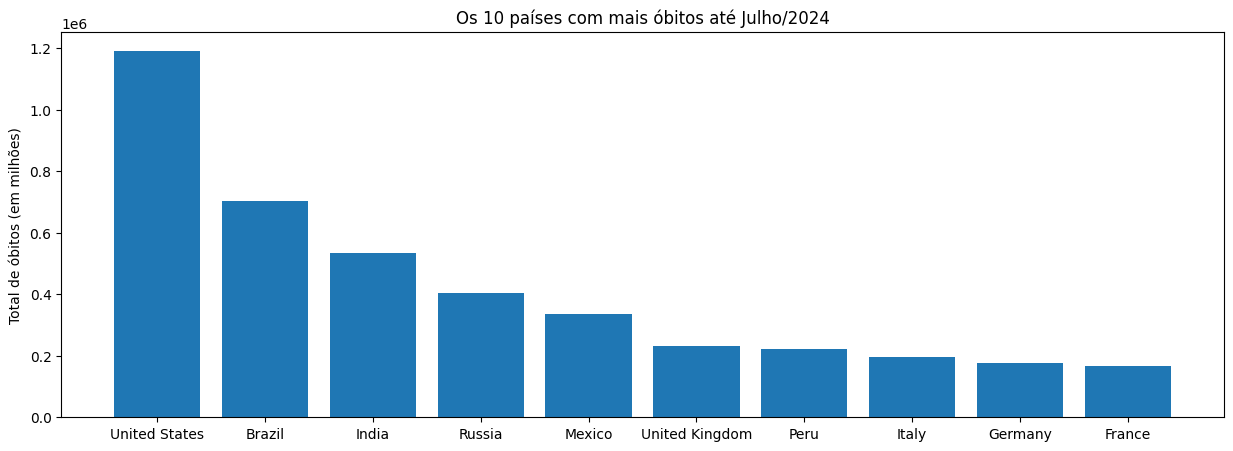

In [56]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# Selecionando os 10 países com mais óbitos acumulados:
top10_2024 = df_sem_OWID.loc[df_sem_OWID.date == '2024-07-31', ['location', 'total_deaths']]\
    .sort_values(by="total_deaths", ascending=False).head(10)

# Criação da figura e do eixo com uma largura acima do padrão:
fig, ax = plt.subplots(figsize=(15, 5))

# Criação do gráfico de barras:
ax.bar(top10_2024['location'], top10_2024['total_deaths'])

# Adicionando títulos e rótulos:
ax.set_title('Os 10 países com mais óbitos até Julho/2024')
ax.set_ylabel('Total de óbitos (em milhões)')

plt.show()



#### Evolução dos óbitos ao longo do tempo

Uma visualização interessante é o aumento do número de óbitos desses cinco países ao longo do tempo, através de um gráfico de linha, para não poluir o gráfico serão mostrados apenas os cinco primeiros países:

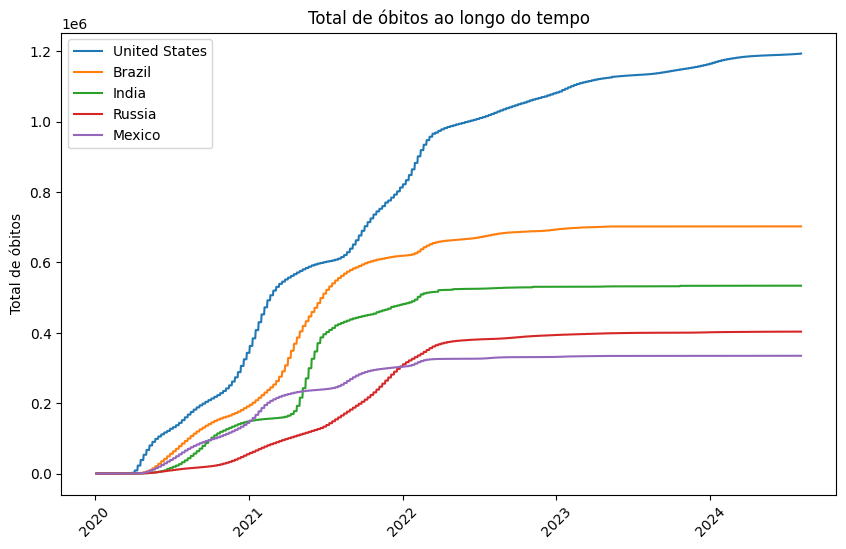

In [57]:
# Selecionando os 5 países com mais óbitos acumulados:
top5 = df_sem_OWID.loc[df_sem_OWID.date == '2024-07-31', ['location', 'total_deaths']]\
    .sort_values(by="total_deaths", ascending=False).head(5)['location']

# Criando uma figura para o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando uma linha para cada um dos 5 países com mais mortes
for country in top5:
    country_data = df_sem_OWID[df_sem_OWID['location'] == country]
    ax.plot(country_data['date'], country_data['total_deaths'], label=country)

# Adicionando título e rótulos
ax.set_title('Total de óbitos ao longo do tempo')
ax.set_ylabel('Total de óbitos')

# Adicionando a legenda para identificar os países
ax.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)  # Ajuste na rotação das datas para melhor visualização
plt.show()


O gráfico tipo "Bar Chart Race" é uma opção mais dinâmico que os gráficos de linha:

O vídeo gerado pode ser acessado  [aqui](https://github.com/gabrielcapela/Panorama_Covid-19/raw/refs/heads/main/bar_chart_race_covid.mp4)

In [58]:
# Instalando  e importando a biblioteca:
!pip install bar_chart_race -q
import bar_chart_race as bcr

In [59]:
# Restringindo o dataset apenas para países com suas datas no dia primeiro de cada mês e com os números de óbitos totais:
df_bcr = df_sem_OWID[df_sem_OWID['date'].dt.day == 1]
df_bcr = df_bcr[['location','date', 'total_deaths']].copy()

# Verificando os 15 países com mais óbitos acumulados até 1º de Agosto de 2024:
df_aux = df_bcr[df_bcr['date'] == '2024-08-01']
df_aux = df_aux.sort_values(by='total_deaths', ascending=False).head(15)
top15 = df_aux['location'].tolist()

# Restringindo o dataset para esses 15 países:
df_bcr = df_bcr[df_bcr['location'].isin(top15)]

# Usando pivot para transformar os dados:
df_bcr = df_bcr.pivot_table(index='date', columns='location', values='total_deaths', aggfunc='sum')


In [62]:
# Plotando o gráfico:
import bar_chart_race as bcr

# Criação do bar chart race com título e velocidade ajustada:
bcr.bar_chart_race(
    df=df_bcr  ,
    filename= 'bar_chart_race_covid.mp4',
    title='Evolução do número de óbitos',
    period_length=1000
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


#### Relação entre IDH e taxa de óbitos

Gerando uma gráfico de dispersão entre o IDH (Índice de Desenvolvimento Humano) e a taxa de óbitos por milhão de habitantes:

In [ ]:
# Primeiramente, será feito a limpeza das entradas que possuem valores ausentes para essas duas variáveis 'gdp_per_capita' e total_cases_per_million'.
df_dispersao = df.dropna(subset=['human_development_index', 'total_deaths_per_million'])

# Criando o gráfico de dispersão:
plt.scatter(df_dispersao['human_development_index'], df_dispersao['total_deaths_per_million'], s=0.5)

#plt.title('Gráfico de Dispersão entre IDH e a taxa de óbitos por milhão de habitantes')
plt.xlabel('IDH')
plt.ylabel('Óbitos por milhão de habitantes')

plt.show()

Contrariando o que seria intuitivo por muitos, países com IDH alto (>0.7) tiveram uma maior taxa de óbitos.

### Análise Exploratória para o Brasil



Nesse tópico serão analisados exclusivamente dados do Brasil. Será verificado quanto tempo demorou em relação aos outros países para o primeiro óbito brasileiro, além de uma comparação gráfica, entre o desenvolvimento do número de óbitos, casos e vacinas.

#### Verificação do primeiro óbito no Brasil

In [ ]:
# Criando um dataframe apenas com os dados do Brasil:
df_brasil = df.loc[df.location == "Brazil"].copy()

# Verificando a data da primeira linha que registra óbitos no Brasil:
data_primeiro_obito_br = df_brasil.loc[df['total_deaths'] > 0]['date'].min()

print(data_primeiro_obito_br)

In [ ]:
# Filtrando o dataframe para encontrar as entradas onde houve pelo menos 1 óbito:
df_obitos = df[df['total_deaths'] > 0]

# Encontrando a linha com a data mais antiga
data_primeiro_obito_world = df_obitos['date'].min()

print(data_primeiro_obito_world)


In [ ]:
# Verficando a diferença de dias entre essa datas:

# Importando o pacote necessário:
from datetime import datetime

dias_diferenca = data_primeiro_obito_br - data_primeiro_obito_world

print("Dias de diferença:", dias_diferenca.days)  # Número de dias


Portanto, cerca de dois meses e meio entre a notificação do primeiro óbito no mundo e o primeiro óbito no Brasil. Dentro das informações fornecidas por esse dataset.

####Gráficos Casos X Óbitos no Brasil

Primeiramente, plotando o crescimento do números de casos e óbitos no Brasil em uma escala linear.

In [ ]:
# Criando a figura e o eixo:
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando as duas séries no mesmo gráfico:
ax.plot(df_brasil['date'], df_brasil['total_cases'], label='Casos Totais', color='blue')
ax.plot(df_brasil['date'], df_brasil['total_deaths'], label='Óbitos Totais', color='red')

# Adicionando título e rótulos:
ax.set_title('Casos Totais e Óbitos Totais (Escala Linear)')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade')
ax.grid(True)

ax.legend()

plt.show()



Notemos que não se pode perceber em detalhes a variação de 'Óbitos Totais' por causa da ordem de grandeza superior da variável 'Casos Totais'. Uma alternativa é mudar apra uma escala logarítmica:




In [ ]:
# Criando a figura e o eixo:
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando as duas séries no mesmo gráfico:
ax.plot(df_brasil['date'], df_brasil['total_cases'], label='Casos Totais', color='blue')
ax.plot(df_brasil['date'], df_brasil['total_deaths'], label='Óbitos Totais', color='red')

# Adicionando título e rótulos:
ax.set_title('Casos Totais e Óbitos Totais (Escala Linear)')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade')
ax.grid(True)

# Ajustando a escala do eixo y para logarítmica:
ax.set_yscale('log')

ax.legend()

plt.show()


#### Óbitos x Vacinas

In [ ]:
# Criando a figura e o eixo:
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando as duas séries no mesmo gráfico:
ax.plot(df_brasil['date'], df_brasil['total_vaccinations_per_hundred'], label='Nº de vacinações a cada 100hab.', color='blue')
ax.plot(df_brasil['date'], df_brasil['total_deaths_per_million'], label='Nº de óbitos a cada 1Mhab.', color='red')

# Adicionando título e rótulos:
ax.set_title('Taxa de Vacinações x Nº de óbitos')
ax.set_xlabel('Data')
ax.set_ylabel('Pessoas')
ax.grid(True)

# Ajustando a escala do eixo y para logarítmica
ax.set_yscale('log')

ax.legend()

plt.show()

Uma fato constante no gráfico é a diminuição do crescimento da taxa de óbitos, após o começo da vacinação.

## Conclusão


Este estudo permitiu uma explanação, através de bibliotecas como 'matplotlib' e 'pandas', sobre a evolução dos casos e mortes no mundo, que apresentou picos em diferentes momentos, refletindo as ondas de infecção e os impactos das medidas de controle em diversos países, sendo realizadas de diferentes formas.

O Brasil teve momentos críticos, figurando como o 2º país com maior número total de óbitos. As análises temporais indicaram que as campanhas de vacinação desempenharam um papel crucial na mitigação dos efeitos da pandemia.

Por fim, a análise destacou a importância de medidas coordenadas e preventivas para mitigar o impacto de pandemias como a COVID-19, ressalta-se a capacidade da ciência de dados em analisar, diagnosticar, predizer e prescrever soluções para esse tipo de problema.